In [2]:
import sys;
sys.path.append('/home/haotruong/Receipt/EasyOCR')
sys.path.append('/home/haotruong/Receipt/text-detection-ctpn')

In [3]:
import requests
from utils.text_connector.custom import general_crop, general_crop_expand, sort_by_polyfit

In [4]:
from pathlib import Path
import numpy as np
import easyocr
import cv2

In [5]:
import notebook_utils as nutils

In [6]:
paths = nutils.list_files("datasets/ReceiptCOOPData_v0.1", "*.jpg")

In [7]:
reader = easyocr.Reader(['en'], gpu=True)

In [74]:
url = 'http://localhost:1127/detect'
im = paths[6]

img = cv2.imread(str(im))

files = {'image': open(str(im.absolute()), 'rb')}
res = requests.post(url, files=files)

In [71]:
def draw_box(bboxes, img):
    image = img.copy()
    # result = np.array(result)
    for i, box in enumerate(bboxes):
        draw_imag = cv2.polylines(image, [np.array(box).astype(np.int32).reshape((-1, 1, 2))],True, (0,255,0) ,thickness=2)

#         draw_imag = cv2.putText(draw_imag, str(i), (np.array(box[0][0][0]).astype(np.int32), np.array(box[0][0][1]).astype(np.int32) - 10) , cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,0,0), thickness =1,lineType=cv2.LINE_AA) 
    nutils.imshow(draw_imag, 25)
    
def draw_box_easyocr(result, img):
    image = img.copy()
    # result = np.array(result)
    for i, box in enumerate(result):
        draw_imag = cv2.polylines(image, [np.array(box[0]).astype(np.int32).reshape((-1, 1, 2))],True, (0,0,255) ,thickness=2)

        draw_imag = cv2.putText(draw_imag, str(i), (np.array(box[0][0][0]).astype(np.int32), np.array(box[0][0][1]).astype(np.int32) - 10) , cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,0,0), thickness =1,lineType=cv2.LINE_AA) 
    nutils.imshow(draw_imag, 25)

['0,opMlart KIEN GIANG', '|332 Nguyen Trung Truc, TP, Rach Gi', '0297,3769,999 - FAX: 0297,3896 . 999', '|9005', 'nia il; chamsockhachhangecoopmart, vn', 'leb', 'PHIEU TINH TIEN', 'ri xuat Hoa don GTG', 'uay: O7lgay: 25/08/202011:18:30', 'vien: Huy', '08934964100709 GV$ BLESS YOU Lamour 3L', 'iia gOC:124,00(', '8934868140023 NG COMFORT thanhl ichTui2', 'goc:163,000,00', '08934868146049 NL$ Sunlight TD HHoalil', 'ATIOY16,500', 'iia goC:93,000', '08934868140023 NG COMFORT thanhlichTui', 'ATIOY129,900,00129,90', 'iia goC:|63,000,0', '08934839124991 BCDR CL0S', 'VATIOY1 45,000,00 45,000', '8934839124809 KDR P/S BVI23 ThanloatTi', 'AT1O%', 'Gia go', '934839124809 KDR P/S BVI23 ThanloatTin', 'ATIOH29,400,00 29,40', 'Gi', '34839124663 KDR P/SSen. Expert bachaI0', 'VATIO91 42,500,00 42,500', '08934839124663 KDR P/SSen. Expert bacha', 'TIOY 42,500,00 42,500.0', '08936081293029 Yen mach nschat XUAN AN', 'IATIOI80,90', ')8934841901979 $ua tt DLADY2O+dchat ko', 'IATIO%2 31,50(', '6081293029 Yen ma

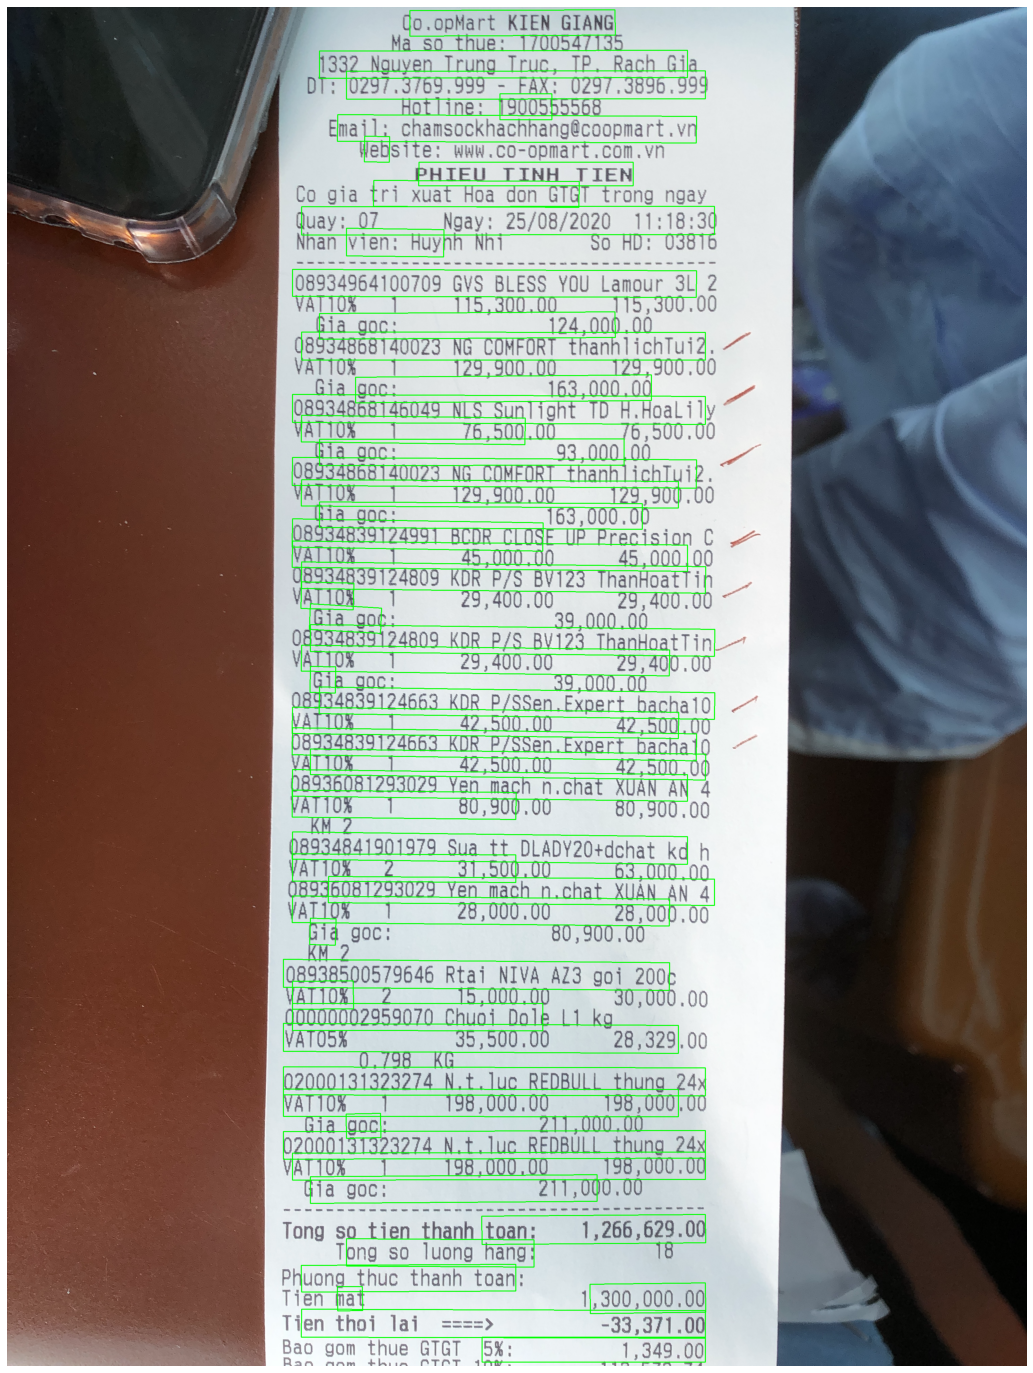

In [76]:
data = res.json()
offset = 10
bboxes = []
for bbox_info in data['text_lines']:
    bboxes.append([  [bbox_info['x0'] - offset, bbox_info['y0'] - offset],
                       [bbox_info['x1'] + offset, bbox_info['y1'] - offset],
                       [bbox_info['x2'] + offset, bbox_info['y2'] + offset],
                       [bbox_info['x3'] - offset, bbox_info['y3'] + offset]
                  ])
    
bboxes = np.array(bboxes)
centroids = np.sum(bboxes, axis=1) / 4
sort_indices = centroids[:, 1].argsort()
full_bbox_sorted = bboxes[sort_indices]
    
texts = []
for bbox in full_bbox_sorted:
    i, _ = general_crop(img, bbox)
    data = reader.recognize(i, contrast_ths=0.15)
    
    text = data[0][1]
    texts.append(text)
    
draw_box(full_bbox_sorted, img)

print(texts)
# nutils.imshow(img)

Co, opMlart KIEN GIANG____Ma So thue; 1700547135_____332 Nguyen Trung Truc, TP, Rach Gia____FAX: 0297,3896 , 999____0T: 0297,3769,999____Hotline: 1900555568____Ena il; chamsockhachhangecoopmart, vn____lebsite: Ill. CO-opmart com. vn____PHIEU____TINH____TIEN____Co gia tri xuat Hoa don GTGT trong ngay____Quay: O7____Ngay: 25/08/2020____11:18 :30____Nhan vien; Huynh Nhi____So |D ; 03816____08934964100709 GV$ BLESS YOU Lamour 3L 2____VATIO$____115,300,00____115,300,00____Gia goc____124,000,00____08934868140023 NG COMFORT thanhlichTui2____VATIO8____129,900,00____129,900,00____Gia goc:____163,000,00____08934868146049 NL$ Sunlight TD HHoalily____VATIO%____16,500,00____16,500,00____Gia goc____93,000,00____08934868140023 NG COMFORT thanhlichTui2____VATIO8____129,900,00____129,900,00____Gia goc____163,000,00____08934839124991 BCDR CL0SE UP Precision C____VATIO8____45,000,00____45,000,00____08934839124809 KDR P/S BVI23 ThanloatTin____VATIO8____29 ,400,00____29 ,400,00____Gia goc____39,000,00____0

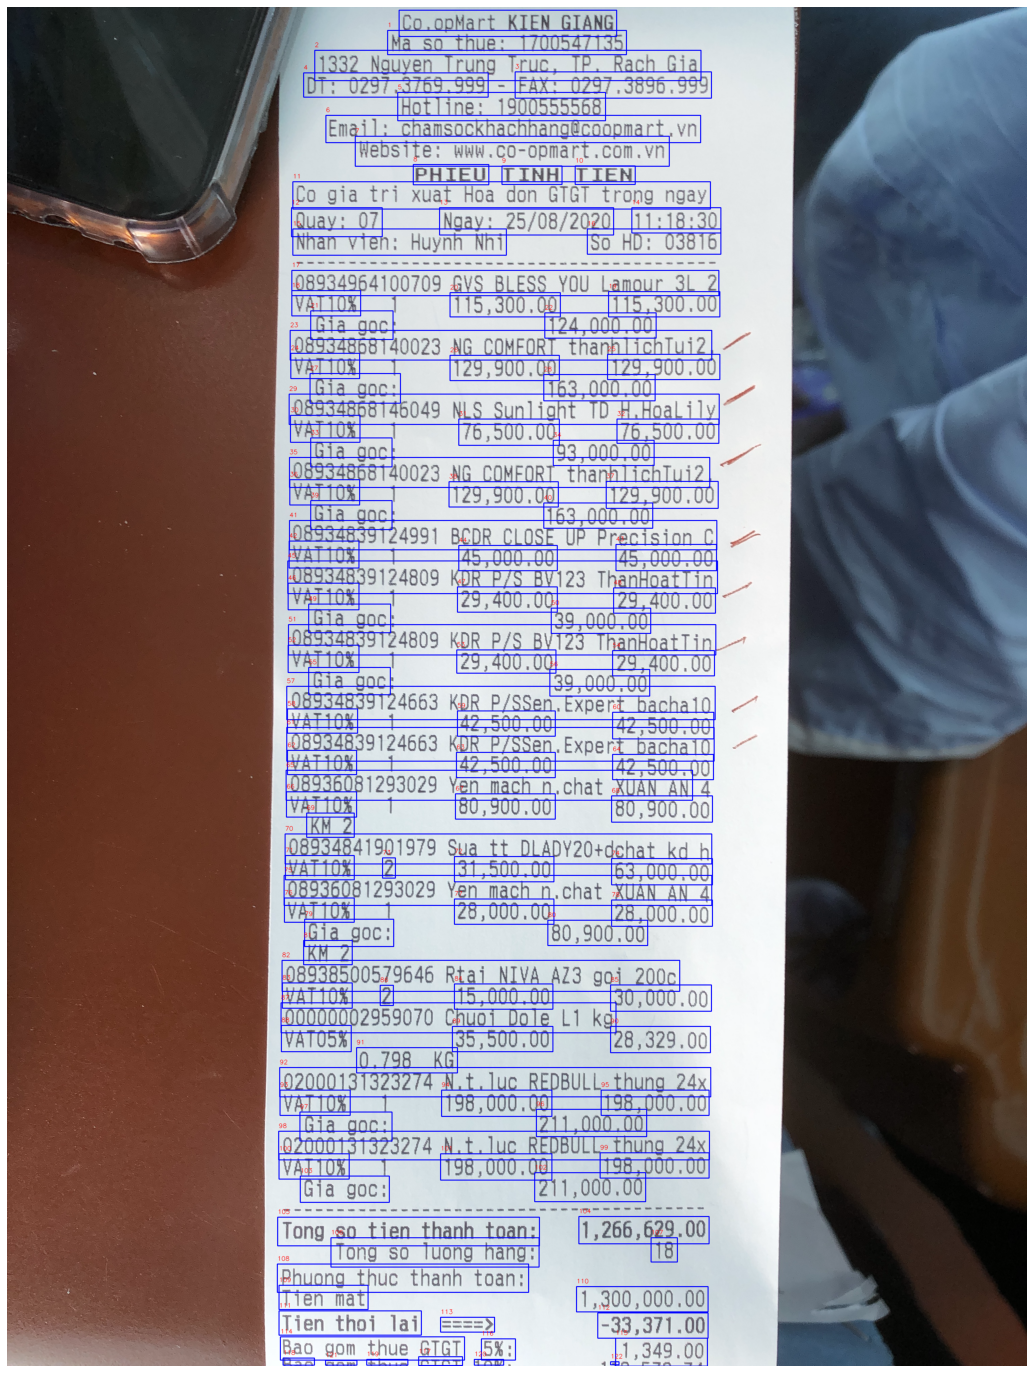

In [75]:
# result = reader.readtext(img, filter_ths = 0.01, detail = 0,contrast_ths=0.15, slope_ths=0.3, width_ths=1, paragraph=True)
# nutils.imshow(img)
result = reader.readtext(img,  filter_ths = 0.01, decoder='beamsearch' , contrast_ths=0.15, slope_ths=0.3, width_ths=1)
draw_box_easyocr(result, img)
print("____".join([t[1] for t in result]))

In [73]:
text = "____".join([t[1] for t in result])

'=.=,=!,.____Co. opMart DONG VAN CONG____Ma so thue: 0301175691-031____P Thanh My Loi____125 Dong Van Cong____0.2____07; (028) 37422350____FAX; 37422306____Hotline: 1900555568____chamsockhachhangecoopnart____Ema il:____vn____Hebsite; WlW Co-opmart  com. vn____PHIEU TIHH TIEI____Co gia tri xuat Hoa don GTGT trong ngay____Quay: O5____||gay: 25/08/2020 10:12;26____Nhan vien: Kim Dung____$0 |[; 03569____00000002950028 Bap cai thao Kg____10 ,850 .60____VAT05%____23 ,900,00____0,454 KG____00g00002958922 Thit cot let heo_ kg-AHT99____70 ,434.00____129 ,000, 00____VAT05%____0,546 KG____00000002958936 Thit heo xay kg-AHT99____10 ,665,60____129 ,900 , 00____|AT05%____544 KG____08934868147619 NX COMFORT k.khuan diunhe____Boorasaa;____86 ,500,00____86____VAT1O%____Gia goC:____08934868141389 NRC Sunlight M Tralhat3.6____107 ,900 , 00____107,900,00____IAT10%____114,000,00____Gia goc:____02000131090893 Hang sale off MM____59 ,000 . 00____59 ,000.00____IATI0%____Tong S0 tien thanh toan:____405 ,350 .2

In [124]:
def draw_box(results, image):
    # result = np.array(result)
    for i, box in enumerate(result):
        draw_imag = cv2.polylines(img, [np.array(box[0]).astype(np.int32).reshape((-1, 1, 2))],True, (0,255,0) ,thickness=2)

        draw_imag = cv2.putText(draw_imag, str(i), (np.array(box[0][0][0]).astype(np.int32), np.array(box[0][0][1]).astype(np.int32) - 10) , cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,0,0), thickness =1,lineType=cv2.LINE_AA) 
    nutils.imshow(draw_imag)

In [ ]:
img = cv2.imread(str(im))
im = paths[3]

texts = []
for bbox in bboxes:
    i, _ = general_crop(img, bbox)
    
    data = reader.recognize(i, contrast_ths=0.15)
    
    text = data[0][1]
    
    nutils.imshow(i)
    print(text)
    
    texts.append(text)